<a href="https://colab.research.google.com/github/zeineb-ouerghi/Capstone-Project-/blob/main/IRT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Loading Data and Libraries 

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [6]:
from google.colab import drive
drive.mount('/content/drive')
## data acquisition 
## Spaced repetition DATA from Duolingo Research 
dataframe = pd.read_csv("/content/drive/MyDrive/Capstone Project/duolingodata.csv.gz")
#Data Cleaning and Manipulation 
#data.head()
#adding variables 
#adding number of mistakes made 
dataframe['mistakes'] = dataframe.history_seen - dataframe.history_correct
dataframe['session_mistakes'] = dataframe.session_seen - dataframe.session_correct
dataframe['rate_of_error_per_session'] = dataframe.session_mistakes/dataframe.session_seen
dataframe['general_rate_of_error'] = dataframe.mistakes/dataframe.history_seen 
# unit='s' to convert it into epoch time
dataframe['Datetime'] = pd.to_datetime(dataframe['timestamp'], 
                                  unit='s')
dataframe.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,p_recall,timestamp,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,session_correct,mistakes,session_mistakes,rate_of_error_per_session,general_rate_of_error,Datetime
0,1.0,1362076081,27649635,u:FO,de,en,76390c1350a8dac31186187e2fe1e178,lernt/lernen<vblex><pri><p3><sg>,6,4,2,2,2,0,0.0,0.333333,2013-02-28 18:28:01
1,0.5,1362076081,27649635,u:FO,de,en,7dfd7086f3671685e2cf1c1da72796d7,die/die<det><def><f><sg><nom>,4,4,2,1,0,1,0.5,0.000000,2013-02-28 18:28:01
2,1.0,1362076081,27649635,u:FO,de,en,35a54c25a2cda8127343f6a82e6f6b7d,mann/mann<n><m><sg><nom>,5,4,1,1,1,0,0.0,0.200000,2013-02-28 18:28:01
3,0.5,1362076081,27649635,u:FO,de,en,0cf63ffe3dda158bc3dbd55682b355ae,frau/frau<n><f><sg><nom>,6,5,2,1,1,1,0.5,0.166667,2013-02-28 18:28:01
4,1.0,1362076081,27649635,u:FO,de,en,84920990d78044db53c1b012f5bf9ab5,das/das<det><def><nt><sg><nom>,4,4,1,1,0,0,0.0,0.000000,2013-02-28 18:28:01


### Linear Regression 


In [ ]:
# Load packages
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

In [ ]:
#split dataset in features and target variable
input_cols = ['general_rate_of_error', 'mistakes', 'session_mistakes', 'general_rate_per_session']
output_cols = ['p_recall']
X = dataframe[input_cols] # Features
y = dataframe[output_cols] # Target variable
#splitting data into training and testing 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=25)

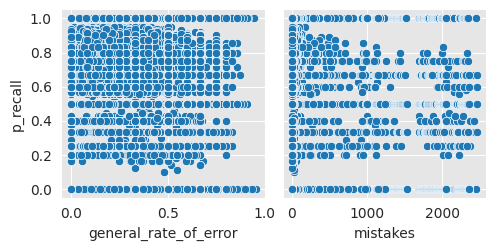

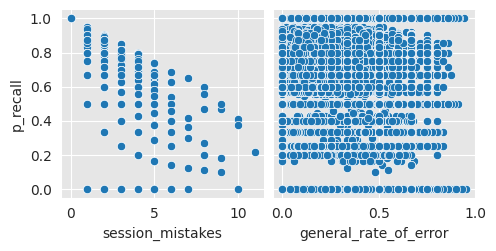

In [ ]:
# Make two figures so it is better visualized
half = len(input_cols)//2

fig1=sns.pairplot(
    dataframe,
    x_vars=input_cols[:half],
    y_vars=output_cols
)

fig2=sns.pairplot(
    dataframe,
    x_vars=input_cols[half:],
    y_vars=output_cols
)

In [ ]:
# Function to flatten 2D lists so it can be used by plotly
def flatten(l):
    return [item for sublist in l for item in sublist]

# Set up and fit the linear regressor
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Flatten the prediction and expected lists
predicted = flatten(lin_reg.predict(X_test))
expected = flatten(y_test.values)

In [ ]:
%matplotlib inline
# Import plotting package
import plotly.express as px

# Put data to plot in dataframe
df_plot = pd.DataFrame({'expected':expected, 'predicted':predicted})

# Make scatter plot from data
fig = px.scatter(
    df_plot, 
    x='expected', 
    y='predicted',
    title='Predicted vs. Actual Values')

# Add straight line indicating perfect model
fig.add_shape(type="line",
    x0=0, y0=0, x1=50, y1=50,
    line=dict(
        color="Red",
        width=4,
        dash="dot",
    )
)

# Show figure
fig.show()

In [ ]:
# Print the root mean square error (RMS)
error = np.sqrt(np.mean((np.array(predicted) - np.array(expected)) ** 2))
print(f"RMS: {error:.4f} ")

r2=r2_score(expected, predicted)
print(f"R2: {round(r2,4)}") 

RMS: 0.1528 
R2: 0.683


### Logistic Regression 

In [ ]:
# add a column to the data that is based on an assumption ; 
#high recall is assummed to be >= 0.5 and low recall is lower 
#this is for the sake of getting a binary column so we can see the trends of the data with logistic regression
dataframe['recall'] = ['High' if x >= 0.5 else 'Low' for x in dataframe['p_recall']]


In [ ]:
#split dataset in features and target variable
feature_cols = ['general_rate_of_error', 'mistakes', 'session_mistakes', 'general_rate_of_error']
X = dataframe[feature_cols] # Features
y = dataframe.recall # Target variable
#splitting data into training and testing 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=25)

In [ ]:
# importing the class
from sklearn.linear_model import LogisticRegression
# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [ ]:
# Model evaluation 
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[2957140,   21753],
       [ 219374,   15290]])

0.5 257.44 Predicted label


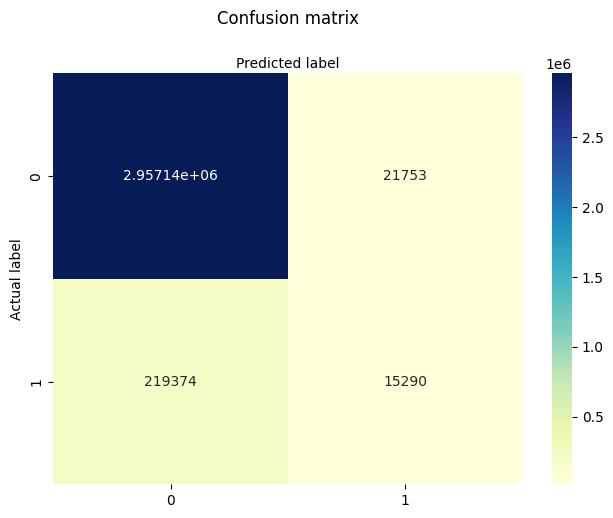

In [ ]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
#confusion matrix evaluation metrics 
from sklearn.metrics import classification_report
target_names = ['Low', 'High']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Low       0.93      0.99      0.96   2978893
        High       0.41      0.07      0.11    234664

    accuracy                           0.92   3213557
   macro avg       0.67      0.53      0.54   3213557
weighted avg       0.89      0.92      0.90   3213557



In [ ]:
#ROC curve 
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

###Item Response Theory 1 : Item Difficulty Level Estimation, Trial function  

In [9]:
sample_data = dataframe[:1000]
sample_data1 = sample_data[['user_id','lexeme_id', 'p_recall']]
data1= list(sample_data1)

In [10]:
class IRTModel:
    def __init__(self, n_items, n_factors=1, alpha=None, beta=None):
        self.n_items = n_items
        self.n_factors = n_factors
        self.alpha = alpha if alpha is not None else np.random.normal(size=n_items)
        self.beta = beta if beta is not None else np.random.normal(size=(n_factors, n_items))

    def fit(self, X, n_iter=100, learning_rate=0.1):
        old_loglik = float('-inf')
        for i in range(n_iter):
            loglik = self._log_likelihood(X)
            if loglik is not None and loglik > old_loglik:
                old_loglik = loglik
            else:
                break
            gradients = self._compute_gradients(X)
            self.alpha += learning_rate * gradients['alpha']
            self.beta += learning_rate * gradients['beta']

    def _log_likelihood(self, X):
        pass

    def _compute_gradients(self, X):
        pass


In [13]:
#initiating the model 
model = IRTModel(n_items=len(sample_data.columns))

In [14]:
#fitting the model 
model.fit(sample_data.values)

# Print the estimated item difficulty parameters
print("Estimated item difficulties:", model.alpha)

Estimated item difficulties: [ 0.43439021 -0.52613286 -1.55870595  0.72933229 -0.92283722 -1.28135355
 -1.88099155  0.74482049 -1.02844646 -0.59152138 -1.67592148 -0.42306661
  0.80893869  1.88848774  1.76616543 -0.58561401 -0.24307623]


## Item Response Theory 2: Model and Concept 

#### For a sample of data of size 1000

In [7]:
#sample_data = dataframe[:1000]
sample_data = dataframe.sample(n=1000)
response_matrix = sample_data[['p_recall','general_rate_of_error','rate_of_error_per_session']]
#data1= list(sample_data1)

In [8]:
def item_response_prob(a, b, theta):
    """Calculate the probability of a correct response for an item given a latent trait score"""
    return 1 / (1 + np.exp(-1 * a * (theta - b)))

In [9]:
def log_likelihood(params, response_matrix):
    """Calculate the log-likelihood of the data given the item parameters and latent trait scores"""
    a = params[0]
    b = params[1:]
    num_items = len(b)
    log_like = 0
    for i in range(response_matrix.shape[0]):
        theta = response_matrix.iloc[i, 0]
        responses = response_matrix.iloc[i, 1:]
        item_probs = item_response_prob(a, b, theta)
        log_like += np.sum(responses * np.log(item_probs) + (1 - responses) * np.log(1 - item_probs))
    return -1 * log_like / num_items
def estimate_parameters(response_matrix):
    """Estimate item parameters using the 2PLM"""
    num_items = response_matrix.shape[1] - 1
    init_params = np.random.normal(size=num_items+1)
    res = minimize(log_likelihood, init_params, args=(response_matrix,), method='Nelder-Mead')
    return res.x
def estimate_latent_traits(response_matrix, params):
    """Estimate latent trait scores using the 2PLM"""
    a = params[0]
    b = params[1:]
    num_individuals = response_matrix.shape[0]
    latent_traits = np.zeros(num_individuals)
    for i in range(num_individuals):
        def neg_log_likelihood(theta):
            item_probs = item_response_prob(a, b, theta)
            log_like = np.sum(response_matrix.iloc[i, 1:] * np.log(item_probs) + (1 - response_matrix.iloc[i, 1:]) * np.log(1 - item_probs))
            return -1 * log_like
        res = minimize(neg_log_likelihood, 0)
        latent_traits[i] = res.x[0]
    return latent_traits



In [10]:
parameters = estimate_parameters(response_matrix)

In [34]:
parameters

array([-3.35425072,  0.12852026,  0.14570014])

In [11]:
latent_traits = estimate_latent_traits(response_matrix, parameters)

In [ ]:
latent_traits 

array([ 6.09400390e-01,  4.62025258e-01,  7.78917619e-01,  3.45010804e-01,
        4.09638721e+00,  7.06446281e-01,  4.09638721e+00,  4.09638721e+00,
        7.06446281e-01,  5.30233389e-01,  6.71447270e-01,  5.01887447e-01,
        7.78917624e-01,  7.78917619e-01,  4.09638721e+00,  4.09638721e+00,
        8.69924460e-02,  9.06306631e-01,  1.44923023e-01,  4.09638721e+00,
        9.62278335e-01,  6.61990424e-01,  4.09638721e+00,  4.09638721e+00,
        4.09638721e+00,  4.09638721e+00,  4.09638721e+00,  4.09638721e+00,
        1.18642980e+00,  4.09638721e+00,  4.09638721e+00,  4.09638721e+00,
        4.09638721e+00,  4.09638721e+00,  4.09638721e+00,  4.09638721e+00,
        6.09400390e-01,  4.09638721e+00,  4.09638721e+00,  6.09400390e-01,
        4.62025254e-01,  4.09638721e+00,  4.09638721e+00,  7.06446281e-01,
        4.09638721e+00,  4.09638721e+00,  4.09638721e+00,  4.09638721e+00,
        8.84941431e-01,  4.09638721e+00,  6.09400390e-01,  6.18742229e-02,
        2.78737441e-02,  

[Text(0.5, 1.0, 'Scatter Plot of Latent Traits')]

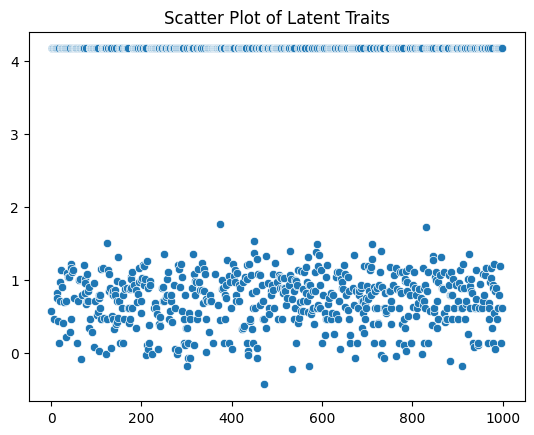

In [22]:
sns.scatterplot(latent_traits).set(title = 'Scatter Plot of Latent Traits')

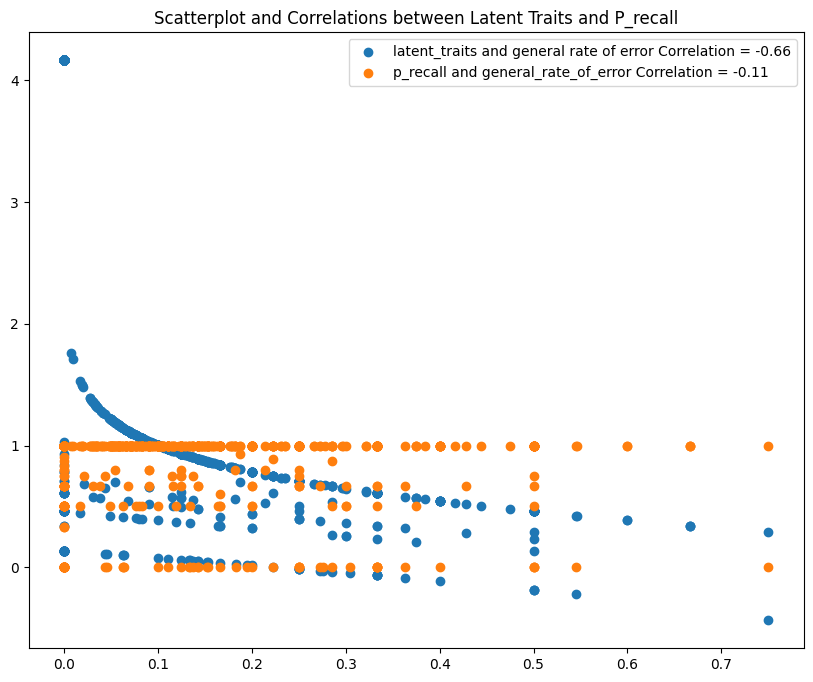

In [29]:
x = response_matrix['general_rate_of_error']
y = response_matrix['p_recall']
y1 = latent_traits
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.scatter(x, latent_traits, label=f'latent_traits and general rate of error Correlation = {np.round(np.corrcoef(x,y1)[0,1], 2)}')
plt.scatter(x, y, label=f'p_recall and general_rate_of_error Correlation = {np.round(np.corrcoef(x,y)[0,1], 2)}')

# Plot
plt.title('Scatterplot and Correlations between Latent Traits and P_recall')
plt.legend()
plt.show()

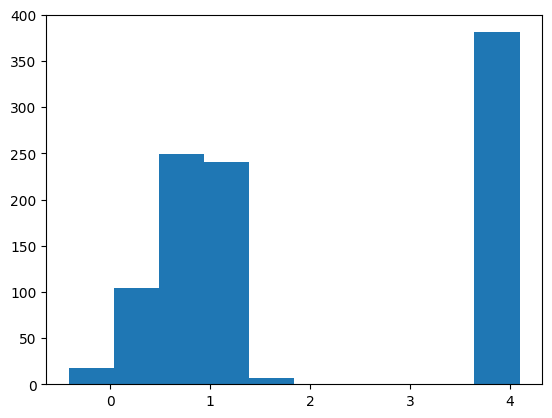

In [ ]:
_ = plt.scatter(latent_traits)
plt.show()